# Practical 02 Exercises

Note: Only the full trajectories will be displayed for Exercise 2 and 3

In [2]:
import numpy as np
from Practical02_Support.Renderer import *
from ece4078.Utility import StartMeshcat

In [3]:
vis = StartMeshcat()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:8080/static/


# Coding exercises

# Exercise 1 (2pts): Determine the Location of the Front Wheel 
    
![bicycle.png](https://i.postimg.cc/Z5NW5KCN/zIhei8A.png)

Given the known 2D location of the centre of the rear wheel of the bicycle ($x$, $y$), determine the location of the centre of the front wheel ($x_f, y_f$) in the world frame. 

**Input**:
- 1D array of shape 2x1 with the location of the rear wheel (rear_wheel_loc)
- Orientation of the bicycle in radians (theta)
- Bicycle length (length)

**Output**:
- 1D array of shape 2x1 with the location of the front wheel in the world frame (values should not be rounded)

In [4]:
def get_front_wheel_location(rear_wheel_loc=np.zeros(2), theta=0, length=0):
    front_wheel_loc = np.zeros(2)
    
    #TODO: Add your code here  ------------------------------------------
    front_wheel_loc[0]=rear_wheel_loc[0]+length*np.cos(theta)
    front_wheel_loc[1]=rear_wheel_loc[1]+length*np.sin(theta)
    
    #END
   
    return front_wheel_loc

**Test your code**

We have included a plot function ``display_bycicle_wheels`` to help you verify your answers. The function will display two frames, one to represent the rear wheel (red) and another to represent the front wheel (blue). Similarly, the function assumes that the steering angle $\delta$ is set to zero. Here is an example of how to use it:

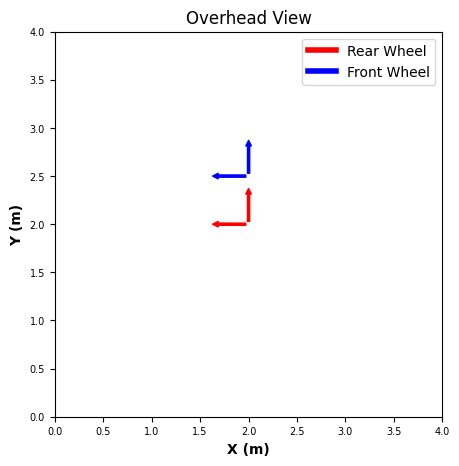

In [5]:
rear_wheel = np.ones(2)*2
theta_angle = 3.14/2
front_wheel = get_front_wheel_location(rear_wheel_loc=rear_wheel, theta=theta_angle, length=0.5)

display_bicycle_wheels(rear_wheel, front_wheel, theta=theta_angle)

As visual test cases, we recommend to consider:

- Where should be the front wheel if $\theta=0$?
- Where should be the front wheel if $\theta=\frac{\pi}{2}$?

### Exercise 2 (3pts): Extend Bicycle Model to Consider Velocity and Steering Angle Rate as Inputs
    
In the example of the bicycle model, the bicycle took as inputs velocity $v$ and steering angle $\delta$.

We now want to modify our model so that it receives velocity $v$ and steering rate $\varphi$ as control inputs instead. With this new control input, the bicycle state is now defined by its 2D position $(x,y)$,  orientation ($\theta$) and steering angle ($\delta$).

You are tasked with deriving the revised model to handle the modified inputs and using the new model to compute the bicycle state for a total of $max\_T$ iterations using this new control input.

Your code should input a constant input velocity and steering rate at each time step.

**Input**:
- 1D array with the initial bicycle state $[x, y, \theta, \delta]$
- Bicycle length (length)
- Maximum number of iterations (max_t)
- Input velocity ($v_i$)
- Input Steering_rate (phi)


**Output**:
- Array of bicycle states of length max_t. Column order must be $[x, y, \theta, \delta]$ (values should not be rounded)

In [6]:
def get_bicycle_trajectory(initial_state = np.array([1, 1, 0, 0]), length=1, max_t=100, v=0, phi=0):
    
    dt = 0.02
    states = np.zeros((max_t+1, initial_state.shape[0]))
    states[0,:] = initial_state
    #TODO: Add your code here --------------------------------------------
    for i in range(1,len(states)):
        states[i,0]=states[i-1,0]+v*np.cos(states[i-1,2])*dt
        states[i,1]=states[i-1,1]+v*np.sin(states[i-1,2])*dt
        states[i,2]=states[i-1,2]+v*np.tan(states[i-1,3])/length*dt
        states[i,3]=states[i-1,3]+phi*dt
    
    #ENDTODO -------------------------------------------------------------
    return states

**Test your code**

We have included a rendering class to help you verify your answers. Here is an example of how to use it:

In [7]:
# Input parameters
initial_state=np.array([5, -5, np.pi/2, 0.1])
length=1
max_t=250
v_i=10
phi=0.2

trj = get_bicycle_trajectory(initial_state, length, max_t, v_i, phi)

vis.delete()
vis.Set2DView(scale = abs(initial_state[0]) + 1)
vis.mask_origin()
display_traj(vis, trj[:, :3], scale = 6)
display(vis.show_inline())

HTML(value='\n                <div style="height: 400px; width: 100%; overflow-x: auto; overflow-y: hidden; re…

As visual test cases, we recommend you to keep in mind that:

- The bicycle should move in a straight line if $\delta=0$, and $\varphi=0$
- The bicycle should move in a circular trajectory if $v \ne 0$, $\delta \ne 0$, and $\varphi=0$
- The bicycle should move in a spiral trajectory if $v \ne 0$, and $\varphi\ne0$

### Exercise 3 (2pts): Differential Drive Kinematic Model

Let us consider a two-wheeled vehicle that has the rotation rate of the wheels as control inputs. 

![diff_drive.png](https://i.postimg.cc/ryfKTG60/IuNNzVB.png)

Given the kinematic constraints that relate the wheel rotation rates to the linear and angular velocity of the PenguiPi robot: 

$$
v=\frac{rw_1 + rw_2}{2} 
$$
$$
\omega=\frac{rw_1 - rw_2}{l}
$$

compute the state, i.e., $[x, y, \theta]$ of the PenguiPi robot for a total of $T_{max}$ iterations using this new control input.

**Input**:
- 1D array with the initial robot state $[x, y, \theta]$
- Wheels width (length, l)
- Wheels radius (wheel_radius, r)
- Maximum number of iterations (max_t)
- Rotation rate of the right wheel (right_rate)
- Rotation rate of the left wheel (left_rate)

**Output**:
- Array of robot states of lenght max_t. Column order must be $[x, y, \theta]$ (values should not be rounded)

In [49]:
def get_penguipi_trajectory(initial_state = np.array([1, 1, 0]), length=1, wheel_radius=0.1,
                            right_rate=0, left_rate=0, max_t=100):
    
    dt = 0.1
    states = np.zeros((max_t+1, initial_state.shape[0]))
    states[0, :] = initial_state
    
    #TODO: Add your code here --------------------------------------------
    
    v=(wheel_radius*(right_rate+left_rate))/2
    w=(wheel_radius*(right_rate-left_rate))/length
    if (w!=0):
        #around icr
        R=v/w
        for i in range(1,len(states)):
            states[i,2]=states[i-1,2]+w*dt
            states[i,0]=states[i-1,0]+R*(-np.sin(states[i-1,2])+np.sin(states[i,2]))
            states[i,1]=states[i-1,1]+R*(np.cos(states[i-1,2])-np.cos(states[i,2]))
    else:
        #just straight
        for i in range(1,len(states)):
            states[i,2]=states[i-1,2]+w*dt
            states[i,0]=states[i-1,0]+v*np.cos(states[i,2])*dt
            states[i,1]=states[i-1,1]+v*np.sin(states[i,2])*dt
    

    #ENDTODO -------------------------------------------------------------
        
    return states

**Test your code**

We have included a rendering class to help you verify your answers. Here is an example of how to use it:


In [47]:
# Input parameters
initial_state=np.array([1, -1, np.pi/4])
length=1
wheel_radius=0.2
right_rate=20
left_rate=20
max_t=200

trj = get_penguipi_trajectory(initial_state, length, wheel_radius, right_rate, left_rate, max_t)

vis.delete()
vis.Set2DView(scale = 4)
vis.mask_origin()
display_traj(vis, trj[:, :3], scale = 6)
display(vis.show_inline())

HTML(value='\n                <div style="height: 400px; width: 100%; overflow-x: auto; overflow-y: hidden; re…

As visual test cases, we recommend you to keep in mind that:

- The PenguiPi robot should move in a straight line if $w_1=w_2$
- The PenguiPi robot should turn to the left if $w_1>w_2$ (the right wheel moves faster than the left wheel)
- The PenguiPi robot should turn to the right if $w_1<w_2$ (the left wheel moves faster than the right wheel)

# Grading
Test cases for giving marks:
- q1: Assess the `get_front_wheel_location` function (2 points)
- q2: Assess the `get_bicycle_trajectory` function (3 points)
- q3: Assess the `get_penguipi_trajectory` function (2 points)

Hint: For question 2 and question 3, the body should have something like 
```
for i in range(max_t):
    ...
    states[i+1,:] = ...
```
Because this is how the solution is constructed, the trajectory has `states[0, :] = initial_state` and the length of the trajectory should be equal to `max_t + 1`

In [50]:
import otter
grader = otter.Notebook(tests_dir = "Practical02_Support/tests")
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!